<a href="https://colab.research.google.com/github/abialbon/pytorch-udacity-scholarship/blob/master/RNN/First_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision


In [0]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

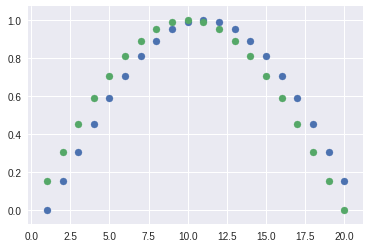

In [8]:
# Creating a data series
n_s = 20
steps = np.linspace(0, np.pi, n_s + 1)

data_x = np.sin(steps)[:-1]
data_x = data_x.reshape(-1, 1)
data_y= np.sin(steps)[1:]
data_y = data_y.reshape(-1, 1)

x_points = np.array([i+1 for i in range(n_s)])
plt.scatter(x_points, data_x)
plt.scatter(x_points, data_y)

In [0]:
from torch import optim

class RNNLearner(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(1, 32, 2, batch_first=True)
        self.fc = nn.Linear(32, 1)
        
        
    def forward(self, x, hidden):
        x, hidden = self.rnn(x, hidden)
        x = x.view(-1, 32)
        x = self.fc(x)
        return x, hidden
    

model = RNNLearner()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [0]:
input_x = torch.tensor(data_x).unsqueeze(0).type(torch.FloatTensor)
output_y = torch.tensor(data_y)


In [22]:
predictions, _ = model.forward(input_x, None)
predictions.shape

torch.Size([20, 1])

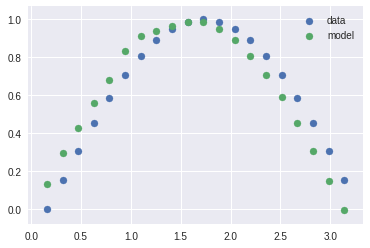

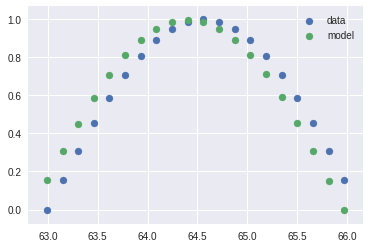

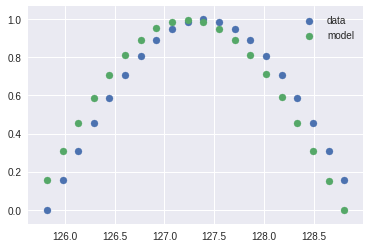

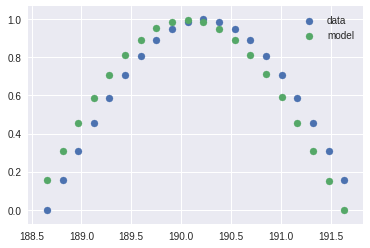

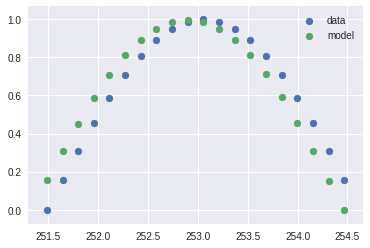

In [50]:
steps = 100
print_every = 20

hidden = None

for step in range(steps):
    time_steps = np.linspace(step*np.pi, (step+1) *np.pi, n_s + 1)
    data_x = np.sin(time_steps)[:-1]
    data_x = data_x.reshape(-1, 1)
    data_y= np.sin(time_steps)[1:]
    data_y = data_y.reshape(-1, 1)
    
    x_input = torch.Tensor(data_x).unsqueeze(0)
    y_output = torch.Tensor(data_y)
    
    predictions, hidden = model.forward(x_input, hidden)
    hidden = hidden.data
    optimizer.zero_grad()
    loss = criterion(predictions, y_output)
    loss.backward()
    optimizer.step()
    
    if (step + 1) % print_every == 1:
        plt.scatter(time_steps[1:], data_x, label='data')
        plt.scatter(time_steps[1:], predictions.detach().numpy(), label='model')
        plt.legend()
        plt.show()